# Lasso with top ten players based on minutes
# subset players who played minimum of 15 games in a season 

In [594]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
import patsy

from sklearn.preprocessing import StandardScaler

# df1 to df5 consist of train data
df1 = pd.read_csv('../../datasets/merged_per_year/merged_2003-02.csv')
df2 = pd.read_csv('../../datasets/merged_per_year/merged_2002-03.csv')
df3 = pd.read_csv('../../datasets/merged_per_year/merged_2003-04.csv')
df4 = pd.read_csv('../../datasets/merged_per_year/merged_2004-05.csv')
df5 = pd.read_csv('../../datasets/merged_per_year/merged_2005-06.csv')

# test data set
df_test = pd.read_csv('../../datasets/merged_per_year/merged_2006-07.csv')

# Games played is the sum of wins and losses so need to drop
df1.drop(['W','L','SEASON'], axis=1, inplace=True)
df2.drop(['W','L','SEASON'], axis=1, inplace=True)
df3.drop(['W','L','SEASON'], axis=1, inplace=True)
df4.drop(['W','L','SEASON'], axis=1, inplace=True)
df5.drop(['W','L','SEASON'], axis=1, inplace=True)
df_test.drop(['W','L','SEASON'], axis=1, inplace=True)

# print df1.shape
# print df2.shape
# print df3.shape
# print df4.shape
# print df5.shape
# print df_test.shape

df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)
df4.dropna(inplace=True)
df5.dropna(inplace=True)
df_test.dropna(inplace=True)

all = [df1,df2,df3,df4,df5]
# Clean Player height and weight columns
for df in all:
    try:
        df.PLAYER_WEIGHT = df.PLAYER_WEIGHT.map(lambda x: int(x))
    except:
        pass

for df in all:
    try:
        df.PLAYER_HEIGHT_INCHES = df.PLAYER_HEIGHT_INCHES.map(lambda x: int(x))
    except:
        pass
  
# Subsetting players that actually play significant minutes

def top_players(df, num_of_players=10, column=['MIN'], min_games=15):
    df = df[df.GP >= min_games]
    return df.sort_values(by=column, ascending=False)[:num_of_players]

group1 = df1.groupby('TEAM_ABBREVIATION').apply(top_players)
group2 = df2.groupby('TEAM_ABBREVIATION').apply(top_players)
group3 = df3.groupby('TEAM_ABBREVIATION').apply(top_players)
group4 = df4.groupby('TEAM_ABBREVIATION').apply(top_players)
group5 = df5.groupby('TEAM_ABBREVIATION').apply(top_players)


# filtering minutes on testing data sets is ok but not GP since that is my target
#group6 = df6.groupby('TEAM_ABBREVIATION').apply(top_players)
print "groups shapes ", group1.shape, group2.shape, group3.shape, group4.shape, group5.shape
# print "group3 and group4 shapes: ", group3.shape, group4.shape
# print "group5 shape: ", group5.shape

print "test shape: ", df_test.shape

subsets = [group1, group2, group3, group4, group5]

subsets[0].columns

groups shapes  (290, 73) (290, 73) (290, 73) (300, 73) (300, 73)
test shape:  (453, 73)


Index([u'Unnamed: 0', u'PLAYER_ID', u'PLAYER_NAME', u'TEAM_ID',
       u'TEAM_ABBREVIATION', u'AGE', u'GP', u'W_PCT', u'MIN', u'FGM', u'FGA',
       u'FG_PCT', u'FG3M', u'FG3A', u'FG3_PCT', u'FTM', u'FTA', u'FT_PCT',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK', u'BLKA',
       u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'PCT_FGA_2PT', u'PCT_FGA_3PT',
       u'PCT_PTS_2PT', u'PCT_PTS_2PT_MR', u'PCT_PTS_3PT', u'PCT_PTS_FB',
       u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV', u'PCT_PTS_PAINT', u'PCT_AST_2PM',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_AST_FGM',
       u'PCT_UAST_FGM', u'lessthan5ft_FGM', u'lessthan5ft_FGA',
       u'lessthan5ft_FG_PCT', u'5_9ft_FGM', u'5_9ft_FGA', u'5_9ft_FG_PCT',
       u'10_14ft_FGM', u'10_14ft_FGA', u'10_14ft_FG_PCT', u'15_19ft_FGM',
       u'15_19ft_FGA', u'15_19ft_FG_PCT', u'20_24ft_FGM', u'20_24ft_FGA',
       u'20_24ft_FG_PCT', u'opp_lessthan5ft_FGM', u'opp_lessthan5ft_FGA',
       u'opp_lessthan5ft_FG_PCT', u'PLAYER_HEIGHT

In [604]:
# train_yrs: trainning dataset years
file_name = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/merged_per_year/merged_%s.csv'
file_name = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/merged_per_year/merged_%s.csv'

# function used to subset players according to team and minutes played per player
def top_players(df, num_of_players=10, column=['MIN'], min_games=15):
    df = df[df.GP >= min_games]
    return df.sort_values(by=column, ascending=False)[:num_of_players]

# function that creates data set of 
def data_block(yrs_list=['2001', '2002', '2003', '2004', '2005', '2006']):

    start = int(yrs_list[0])
    end = int(yrs_list[-1])
    
    years = [str(i) + '-' + str(int(i)+1)[-2:] for i in yrs_list]
    #===> ['2001-02', '2002-03', '2003-04', '2004-05', '2005-06']
    
    # trainning data set(5 years)
    df_list = []
    for y in years:
        df = pd.read_csv(file_name % y)
        df.drop(['W','L', 'SEASON'], axis=1, inplace=True)
        df.dropna(inplace=True)
        
        # convert height and weight to Integer
        try:
            df.PLAYER_WEIGHT = df.PLAYER_WEIGHT.map(lambda x: int(x))
        except:
            pass

        try:
            df.PLAYER_HEIGHT_INCHES = df.PLAYER_HEIGHT_INCHES.map(lambda x: int(x))
        except:
            pass
 
        df_list.append(df)

    # Subsetting players for each year in df_list that play significant minutes
    subsets = [df.groupby('TEAM_ABBREVIATION').apply(top_players) for df in df_list]
    
    # Append all data frames in subsets  into a single data frame
    df_data = pd.DataFrame()
    for df in subsets:
        df_data = df_data.append(df[df.columns[5:]].reset_index(), ignore_index=True)
    
    # all data
    all_data_list = []
    for y in years:
        df = pd.read_csv(file_name % y)
        df.dropna(inplace=True)
        try:
            df.PLAYER_WEIGHT = df.PLAYER_WEIGHT.map(lambda x: int(x))
        except:
            pass

        try:
            df.PLAYER_HEIGHT_INCHES = df.PLAYER_HEIGHT_INCHES.map(lambda x: int(x))
        except:
            pass
 
        all_data_list.append(df)
    
    df_all = pd.DataFrame()
    for df in all_data_list:
        df_all = df_all.append(df, ignore_index=True)
        
    # removing redundant variables
    redundant_variables = ['DREB', '15_19ft_FGM', '20_24ft_FGM', '10_14ft_FGM','5_9ft_FGM', 'lessthan5ft_FGM',
                           'opp_lessthan5ft_FGM', 'PCT_UAST_2PM', 'PCT_UAST_FGM','PCT_PTS_3PT']
    # 'DREB' because directly correlated with 'REB'
    # 'PCT_PTS_3PT' because directly correlated with 'PCT_FGA_3PT'.
    #  FGM categories because directly correlated with FGA.

    df_data.drop(redundant_variables, axis=1, inplace=True)

    # train data set 2001-02 to 2005-06
    non_GP_columns = [col for col in df_data.columns[2:] if col != 'GP']
    block, gp = df_data[non_GP_columns], df_data.GP.values
          
    print "Block and Games played (total rows, total columns): ", block.shape, gp.shape
    print "Total data (rows, columns)", df_data.shape
    return df_all, block, gp
       

In [600]:
# Minimum number of minutes in each group

# for i, df in enumerate(subsets):
#     print "Group%s" % (i+1)
#     print "Minimum minutes:", df.MIN.min()
#     print "Minimum GP: ", df.GP.min()
#     print df.info()
#     print "===================="
    
# # for i, df in enumerate(df_list):
#     print "Group%s" % (i+1), df.GP.describe()
#     print "=========================="

In [601]:
# Append all data frames in df_list into a single data frame
df_data = pd.DataFrame()
for df in subsets:
    df_data = df_data.append(df[df.columns[5:]].reset_index(), ignore_index=True)

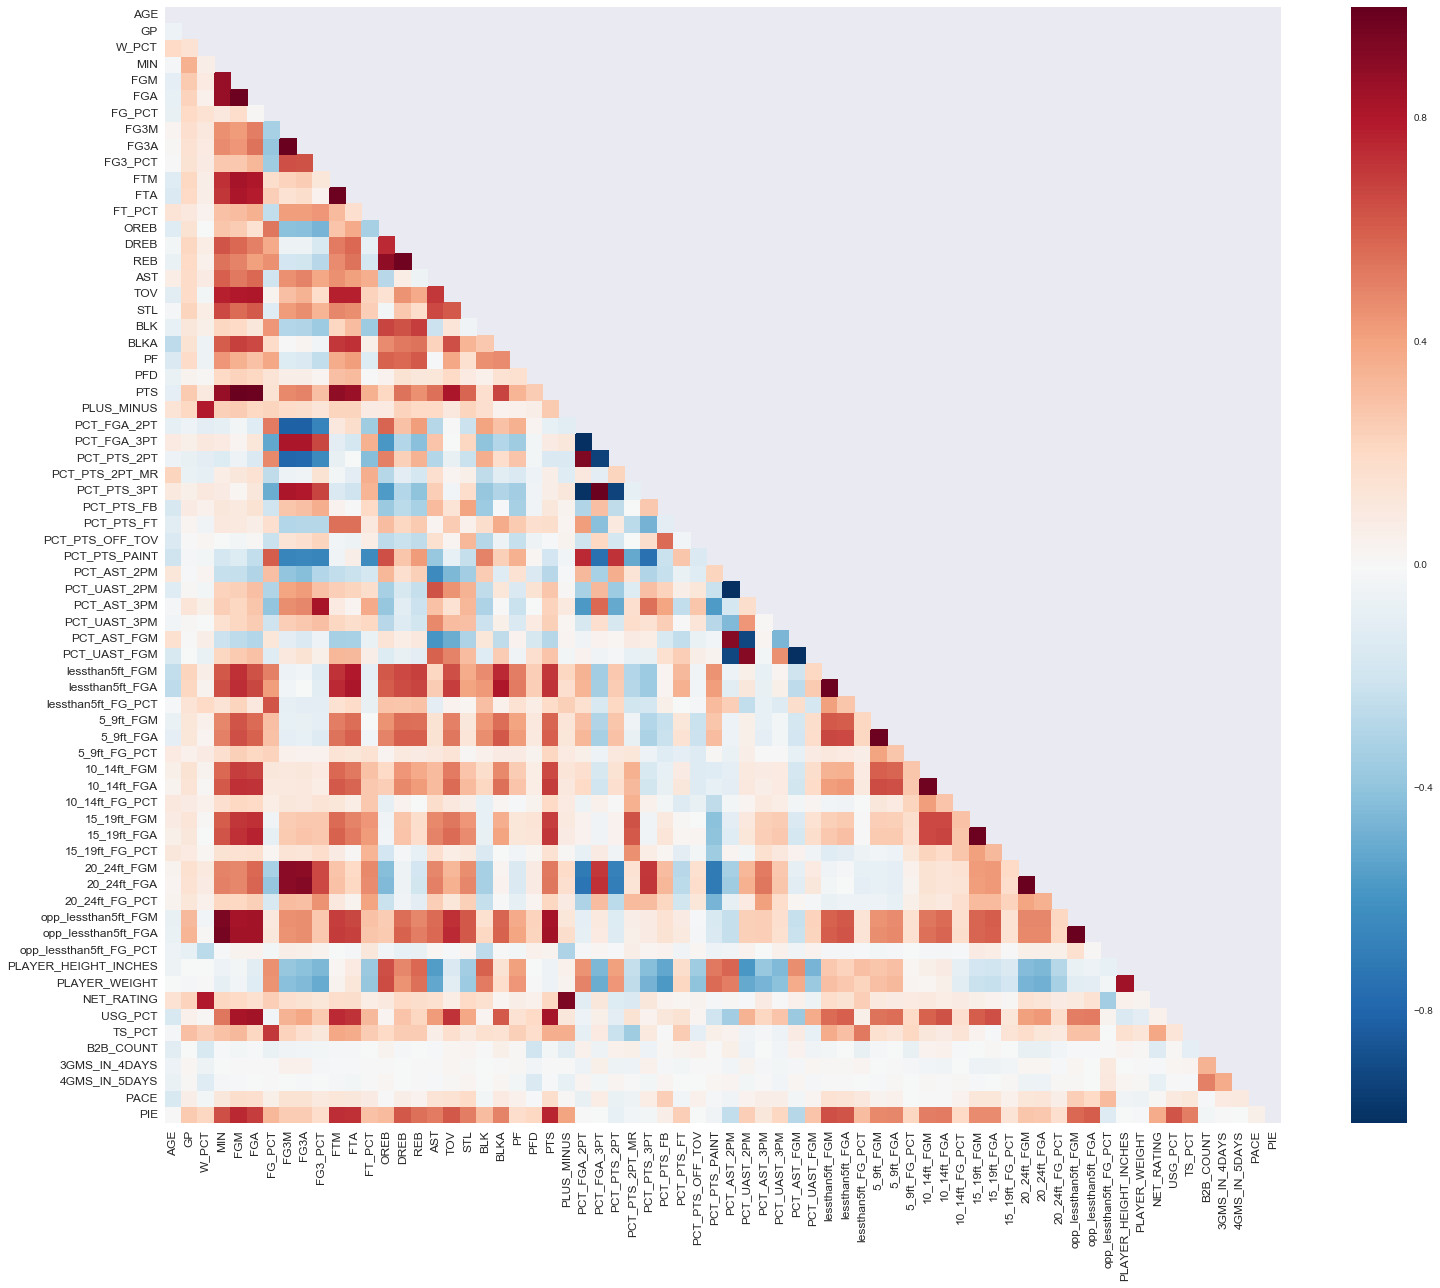

In [410]:
all_corr = df_data.iloc[:,2:].corr()

# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(25,20)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(all_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(all_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()


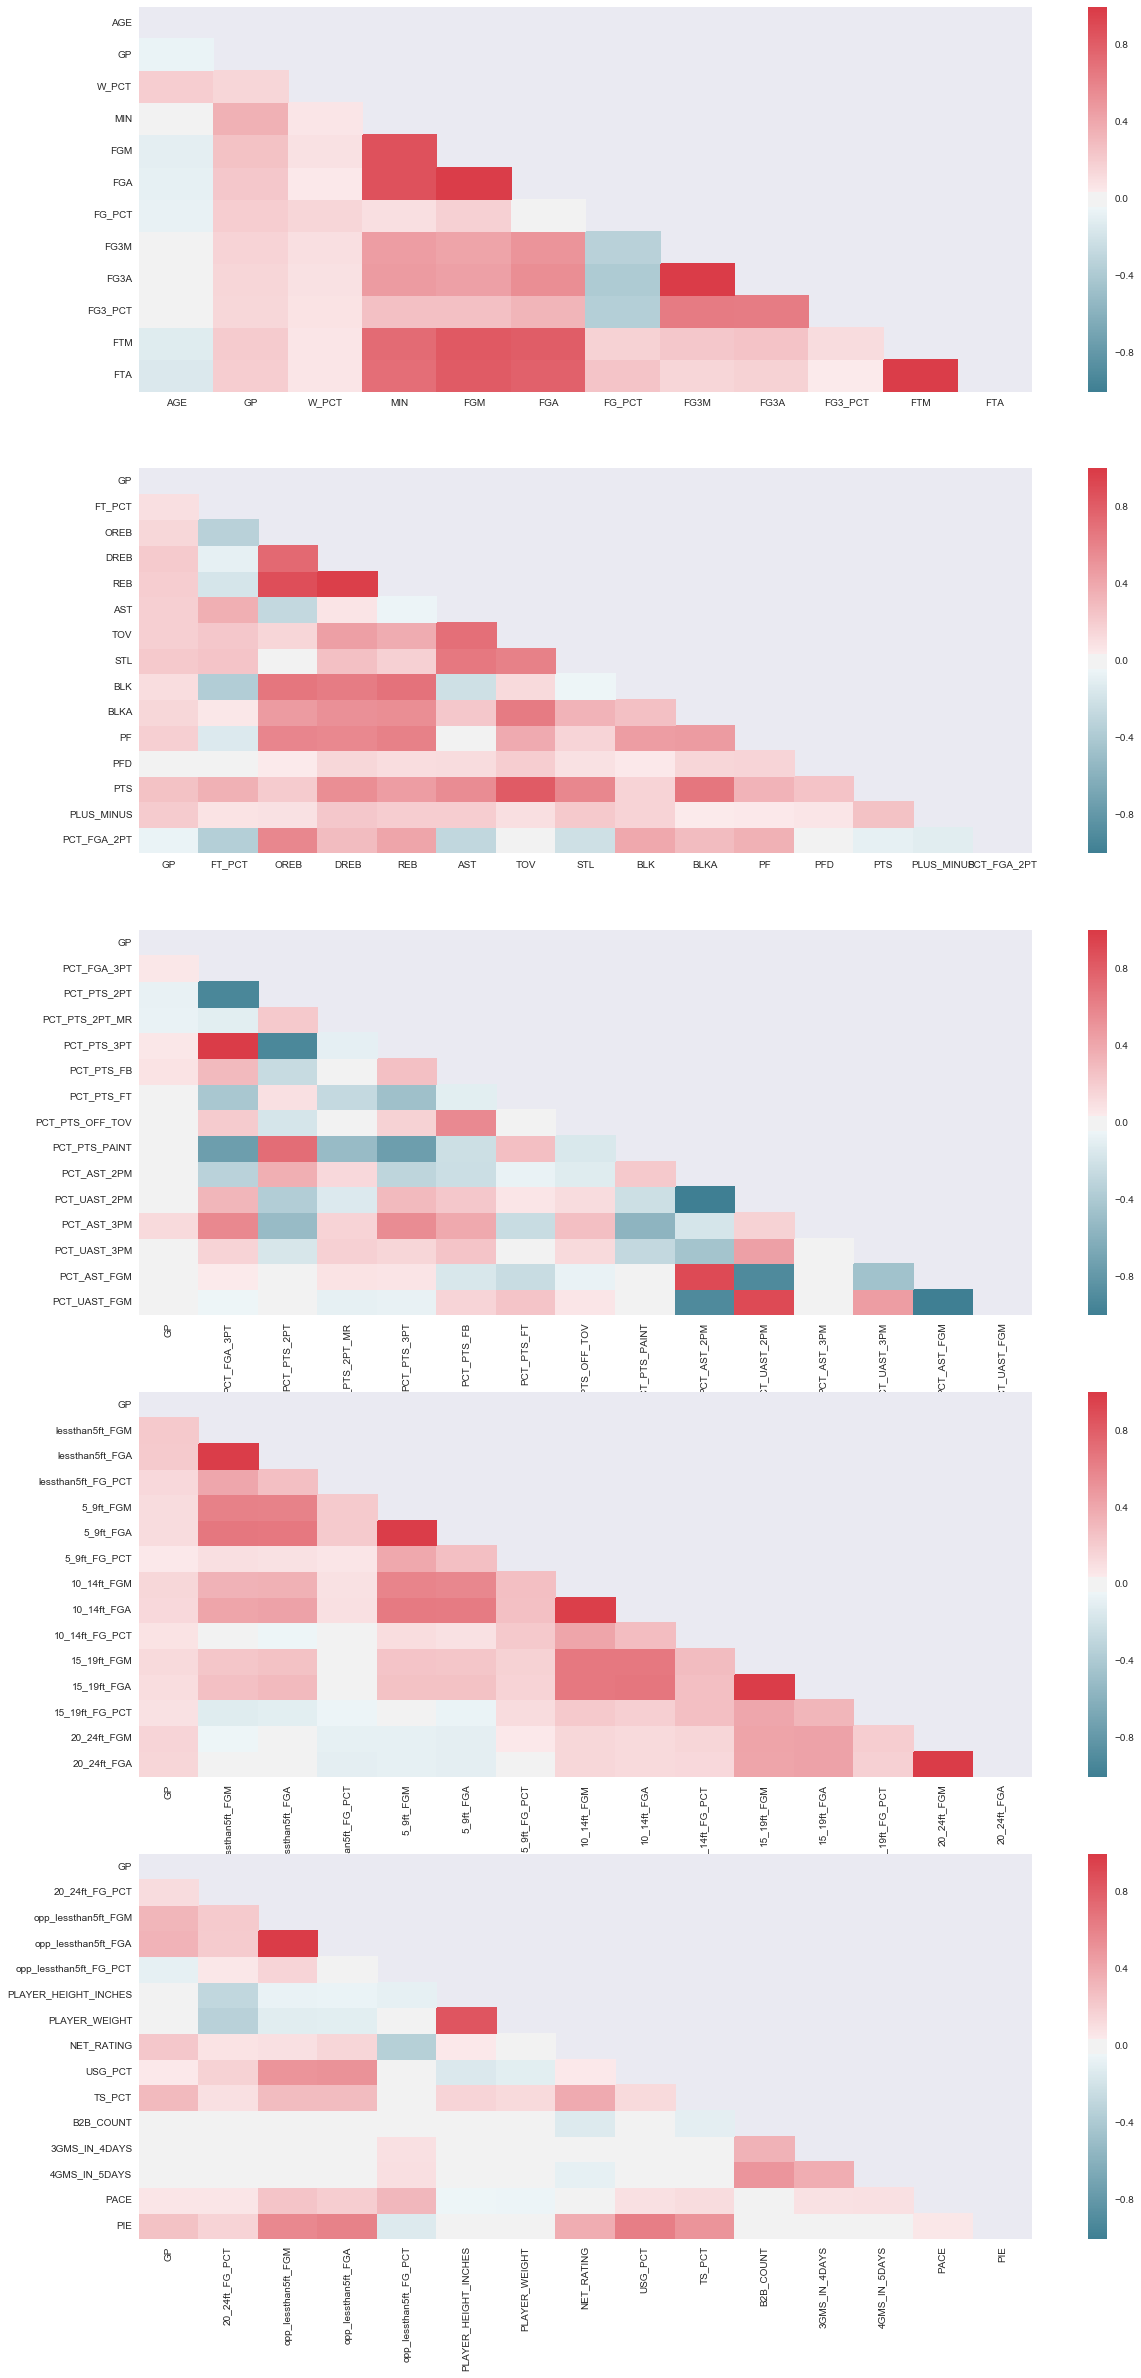

In [512]:
gp = df_data['GP']
a_corr = df_data.iloc[:,2:14].corr()
b_corr = pd.concat([gp, df_data.iloc[:,14:28]], axis=1).corr()
c_corr = pd.concat([gp, df_data.iloc[:,28:42]], axis=1).corr()
d_corr = pd.concat([gp, df_data.iloc[:,42:56]], axis=1).corr()
e_corr = pd.concat([gp, df_data.iloc[:,56:]], axis=1).corr()

f, ax = plt.subplots(5,1,figsize=(20, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
a_mask = np.zeros_like(a_corr, dtype=np.bool)
a_mask[np.triu_indices_from(a_mask)] = True

b_mask = np.zeros_like(b_corr, dtype=np.bool)
b_mask[np.triu_indices_from(b_mask)] = True

c_mask = np.zeros_like(c_corr, dtype=np.bool)
c_mask[np.triu_indices_from(c_mask)] = True

d_mask = np.zeros_like(d_corr, dtype=np.bool)
d_mask[np.triu_indices_from(d_mask)] = True

e_mask = np.zeros_like(e_corr, dtype=np.bool)
e_mask[np.triu_indices_from(e_mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(a_corr, mask=a_mask, cmap=cmap, ax=ax[0])
sns.heatmap(b_corr, mask=b_mask, cmap=cmap, ax=ax[1])
sns.heatmap(c_corr, mask=c_mask, cmap=cmap, ax=ax[2])
sns.heatmap(d_corr, mask=d_mask, cmap=cmap, ax=ax[3])
sns.heatmap(e_corr, mask=e_mask, cmap=cmap, ax=ax[4])

plt.show()

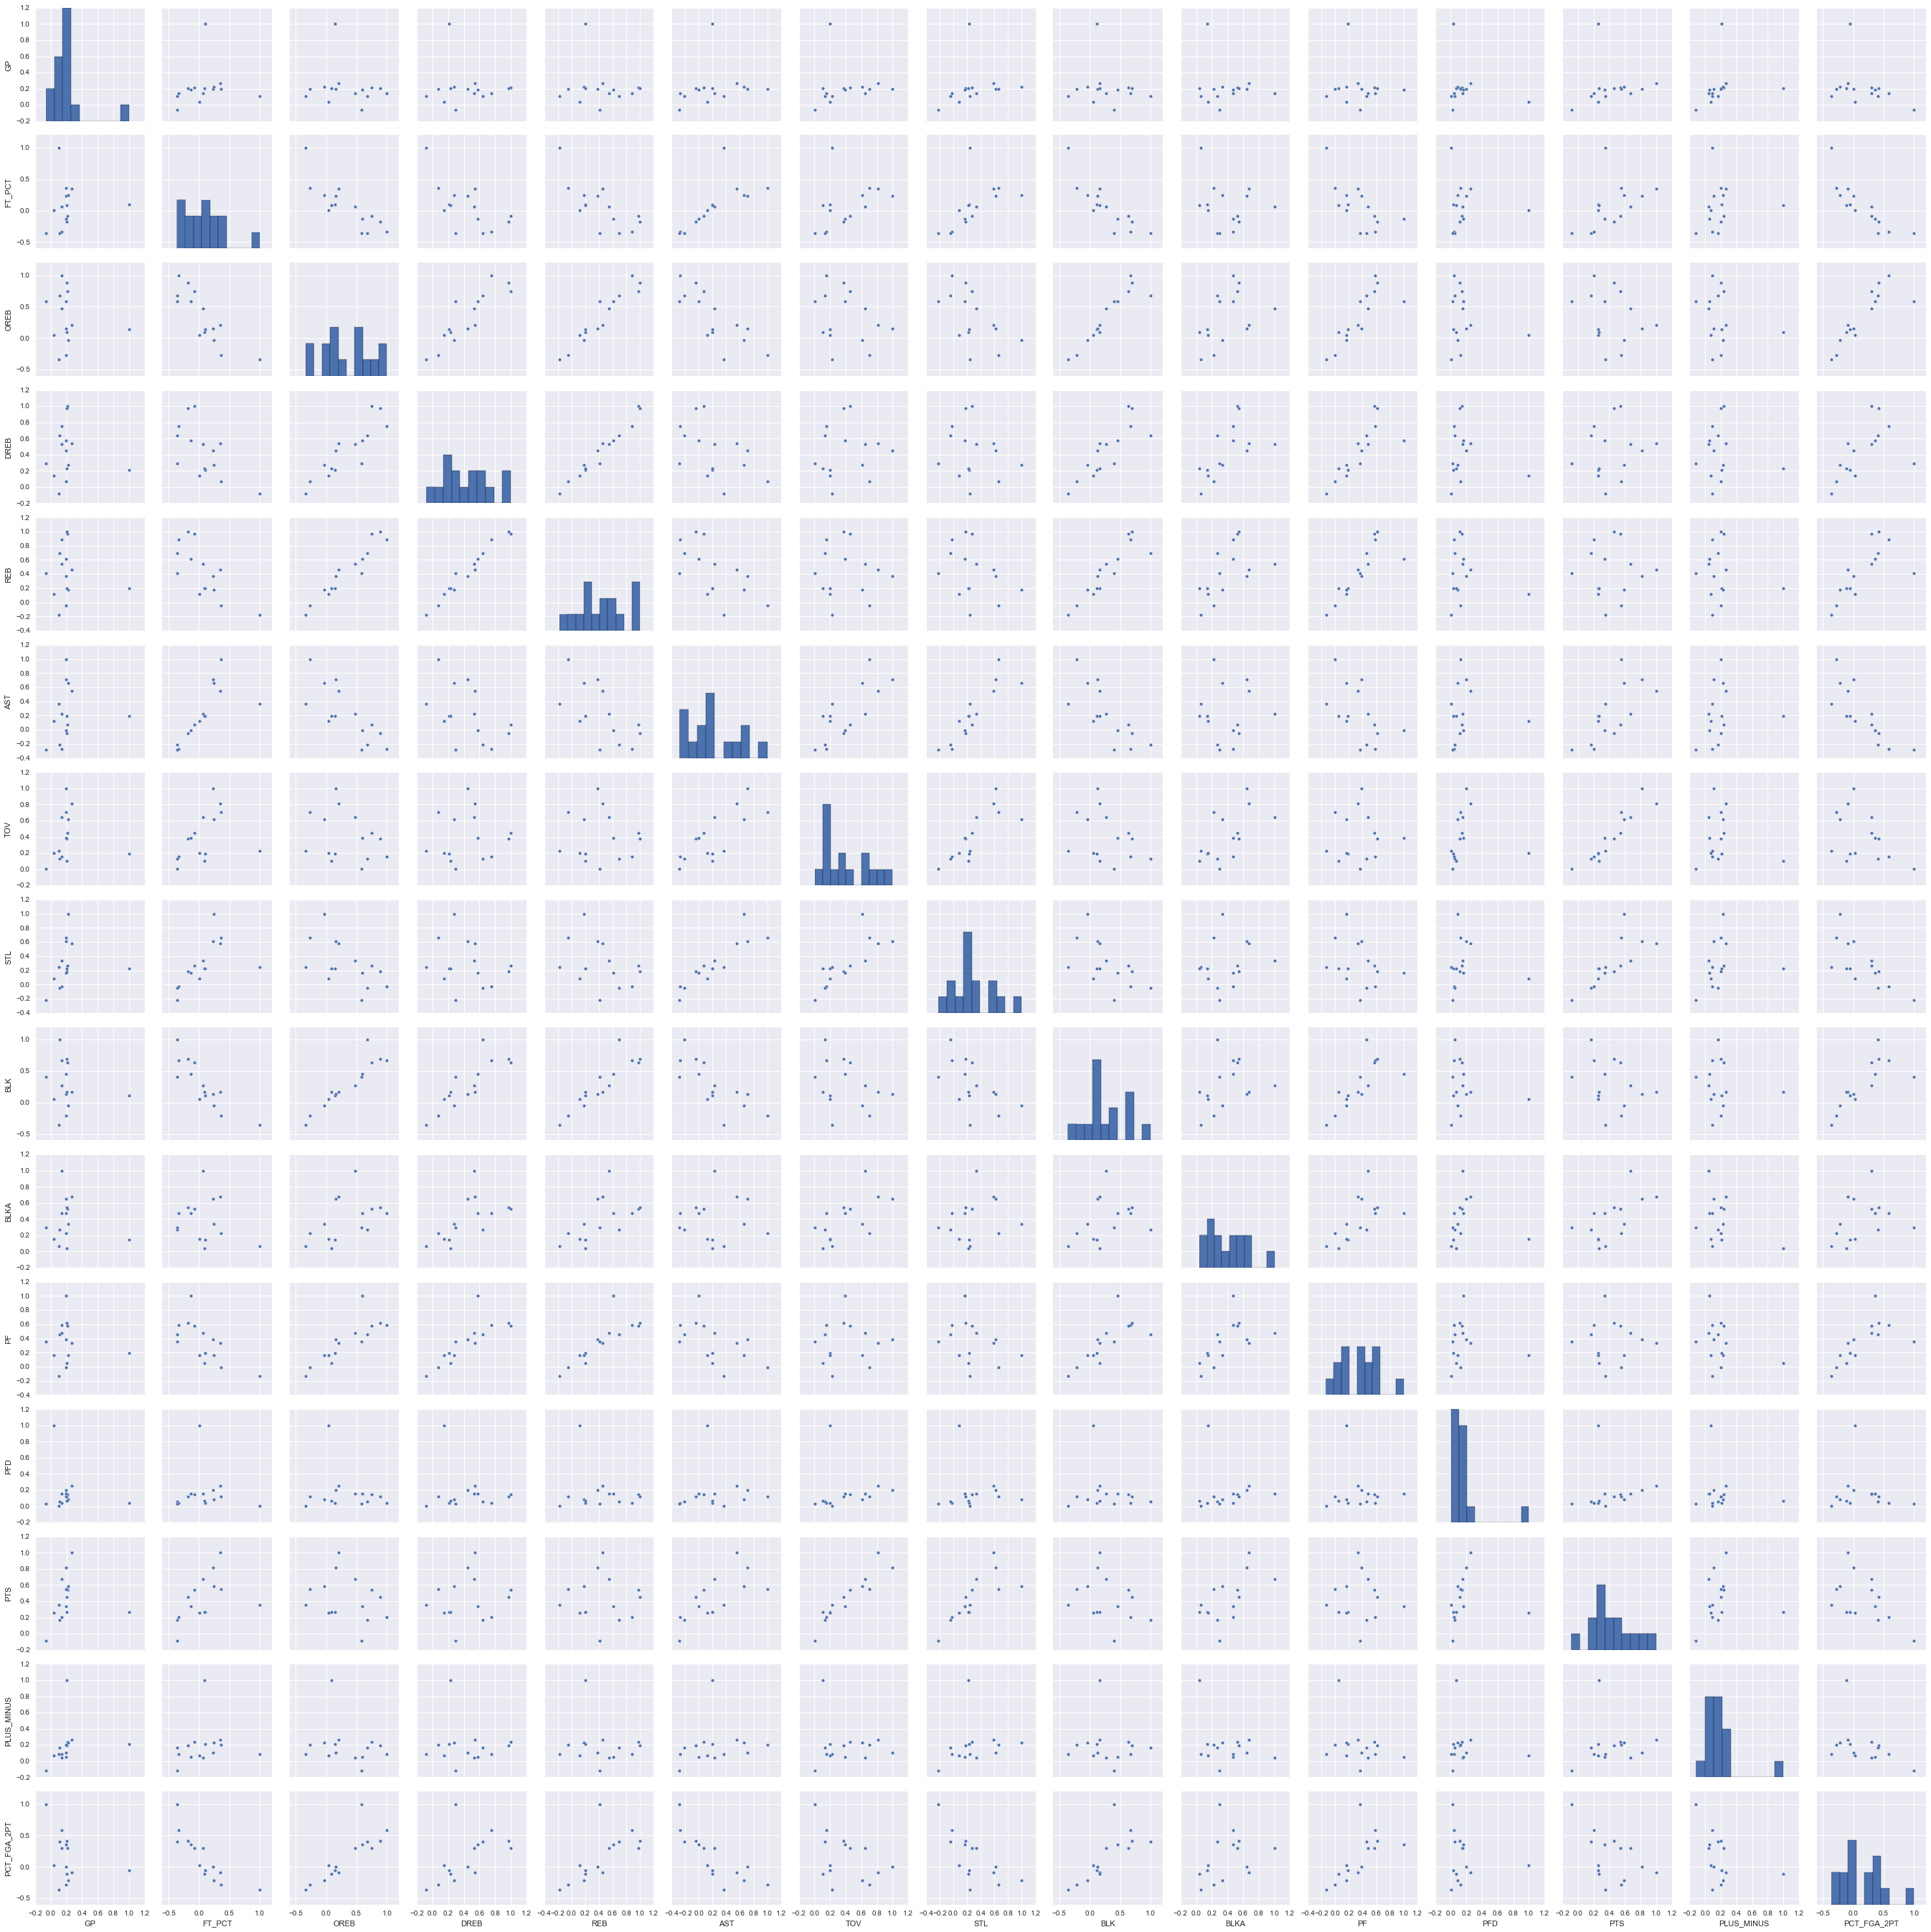

In [537]:
sns.pairplot(b_corr)
# FT_PCT is a good indicator between Gaurds vs "Big Men". 
# Higher FT_PCT directly correlate with "Gaurd" stats: ASTS, STLS, TOV.
# Lower FT_PCT directly correlate with "BIG MEN" stats:  BLK, BLKA, Rebound stats, PF

# Little correlation PFD, plus-minus


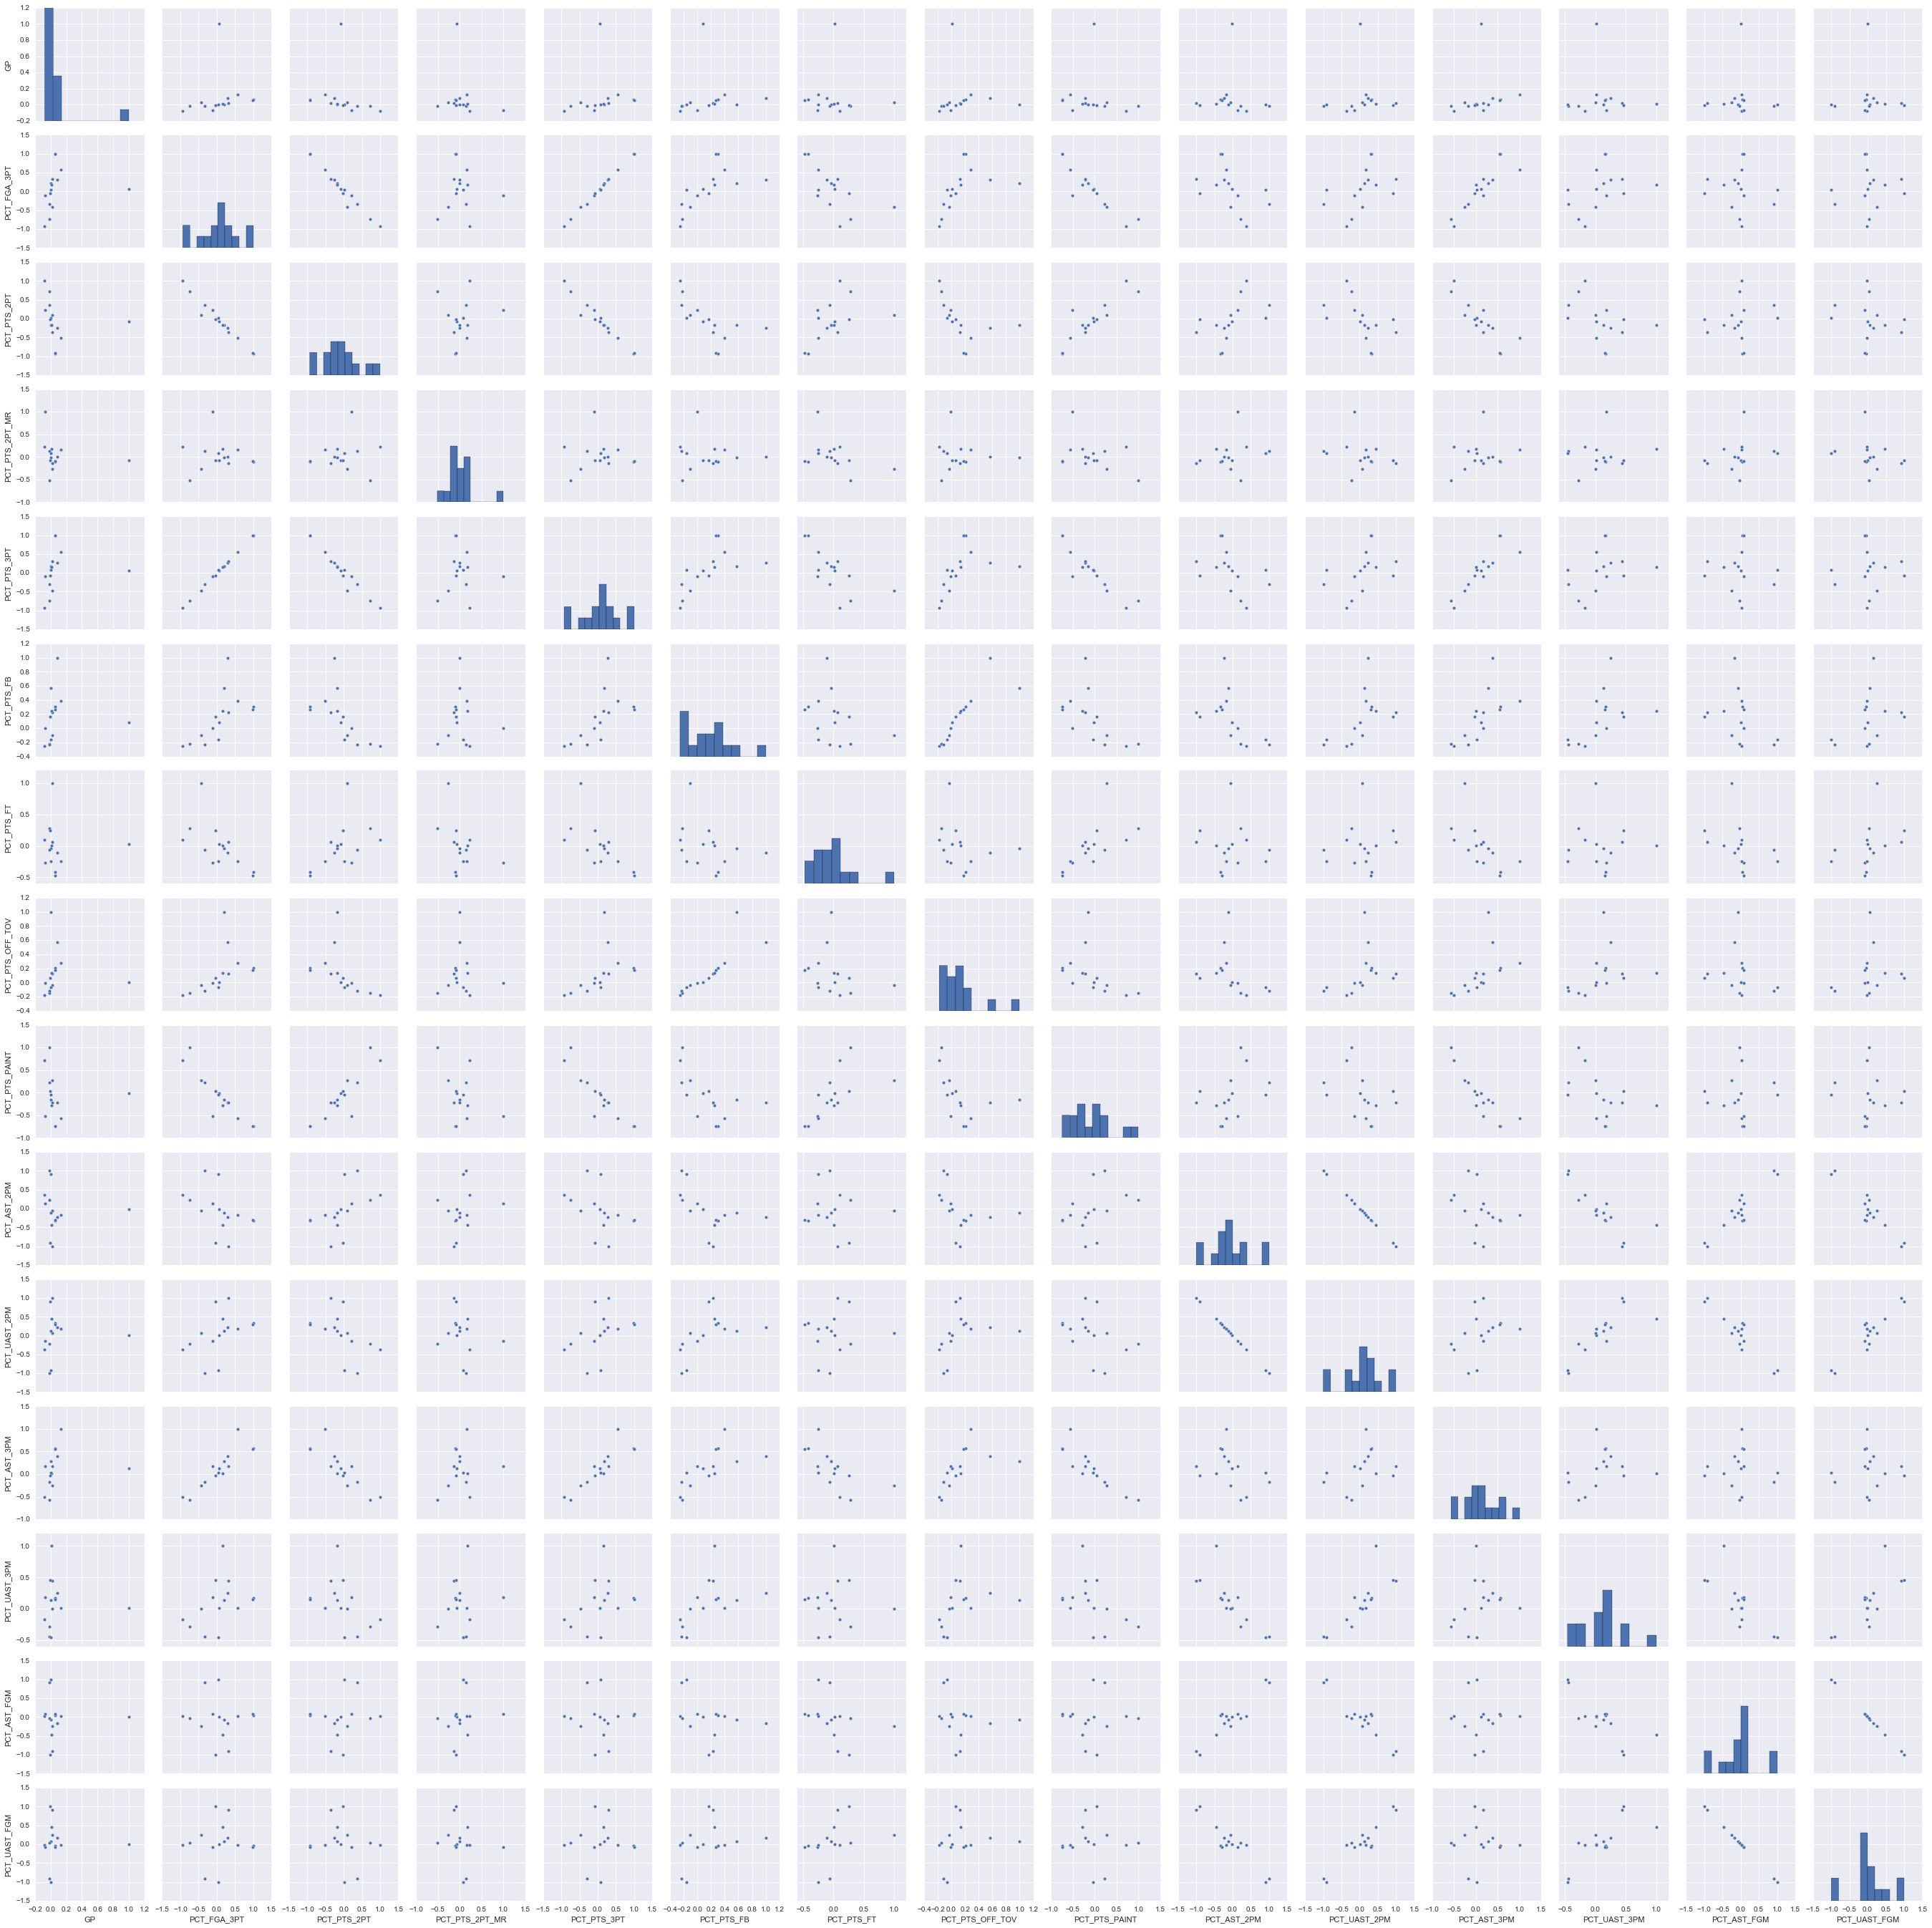

In [538]:
sns.pairplot(c_corr,)
# 'PCT_PTS_3PT' directly correlated 'PCT_FGA_3PT' so dropping the latter.


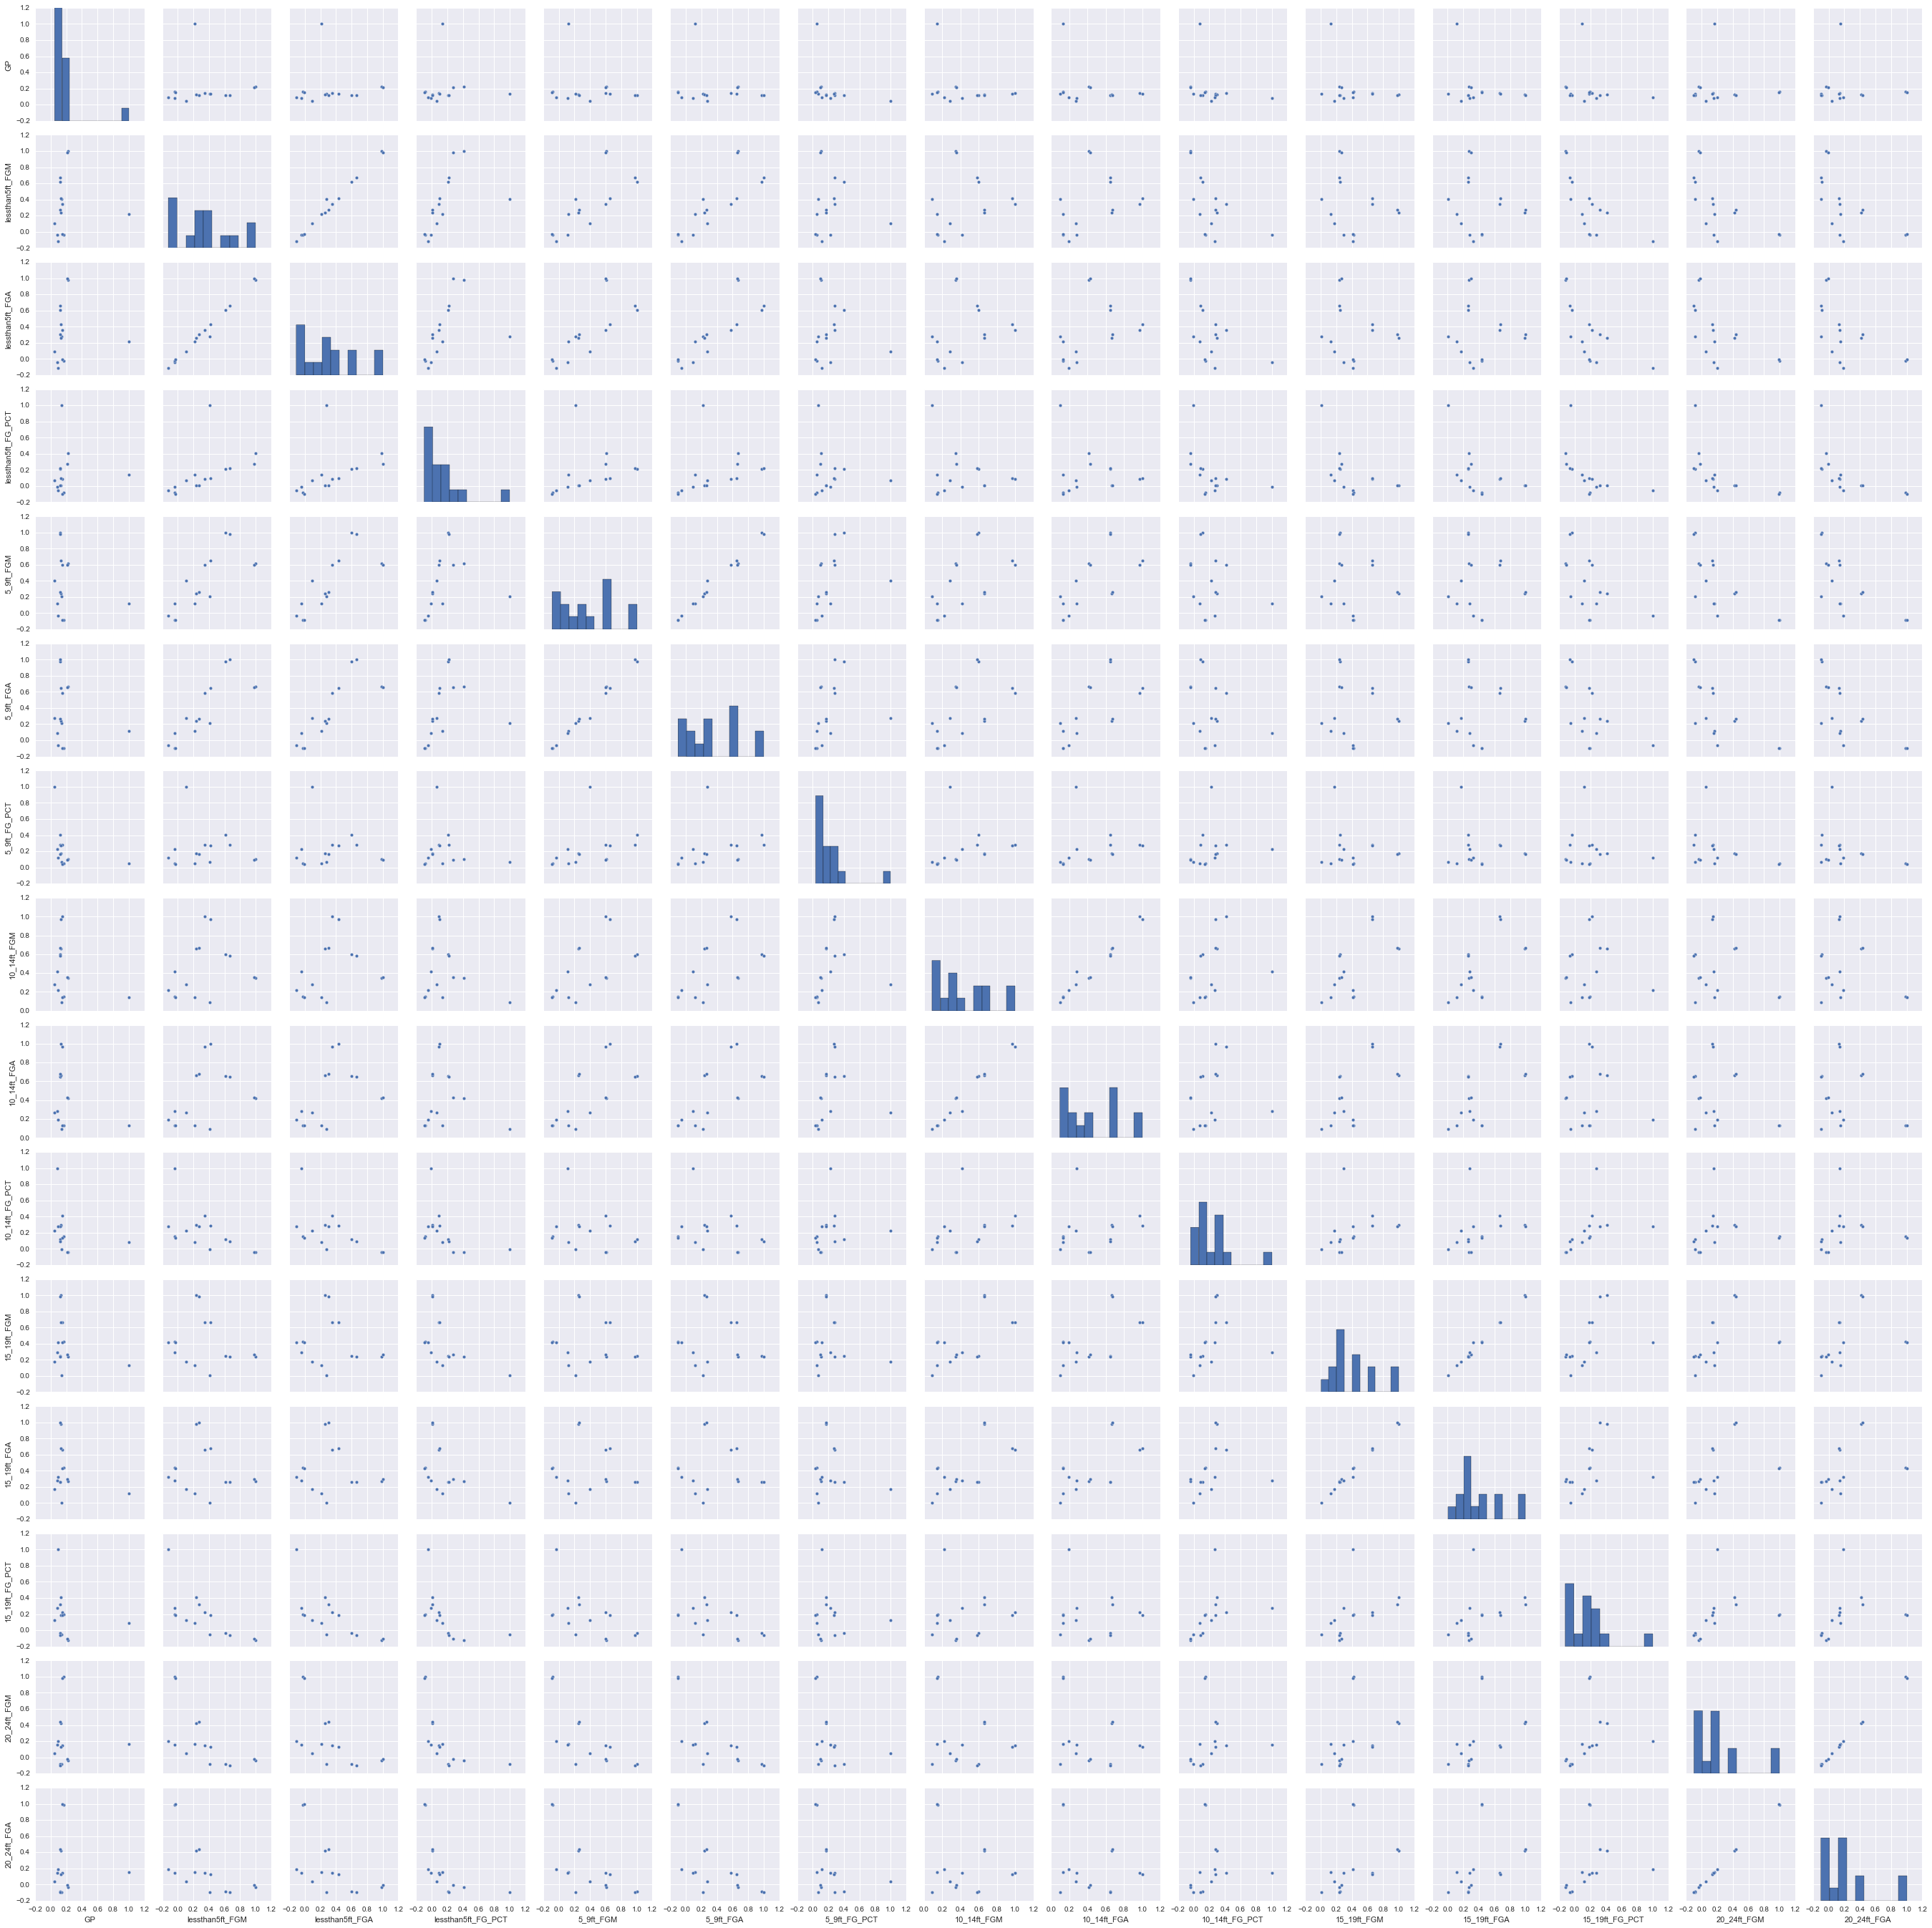

In [539]:
sns.pairplot(d_corr)
# FGA and FGM for each shooting range is directly correlated so I will choose FGA into model and drop FGM.

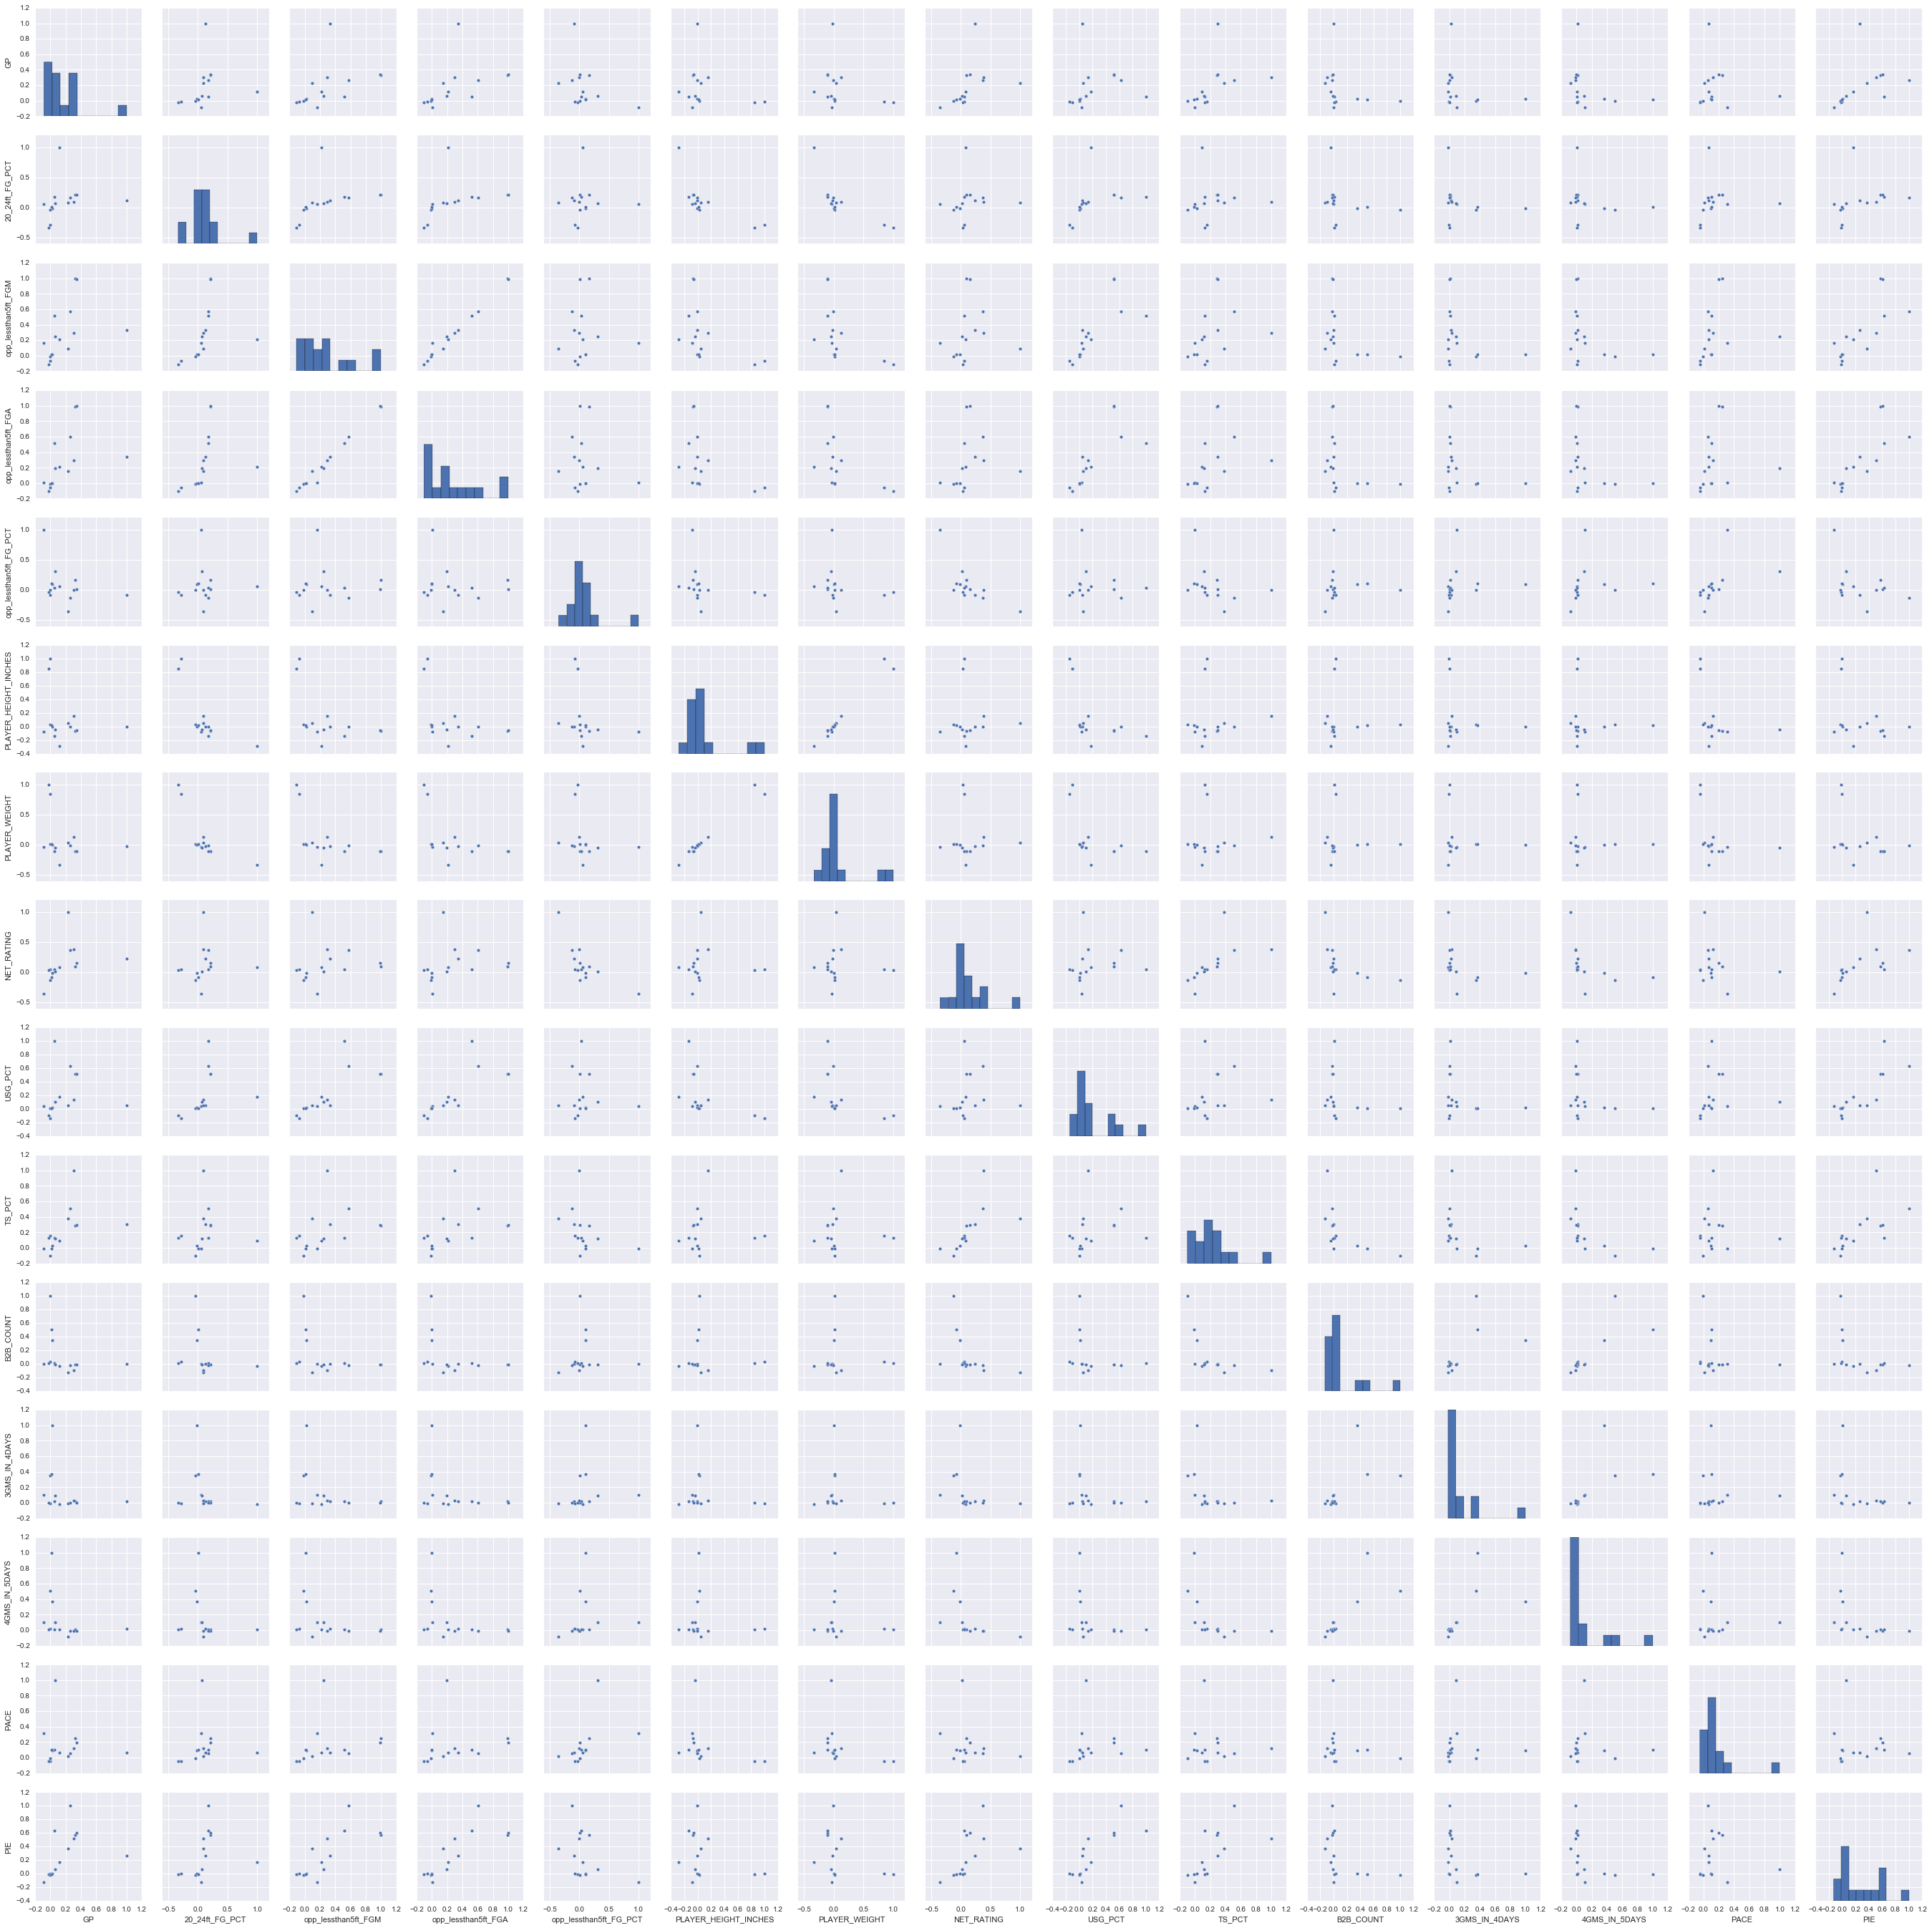

In [540]:
sns.pairplot(e_corr)

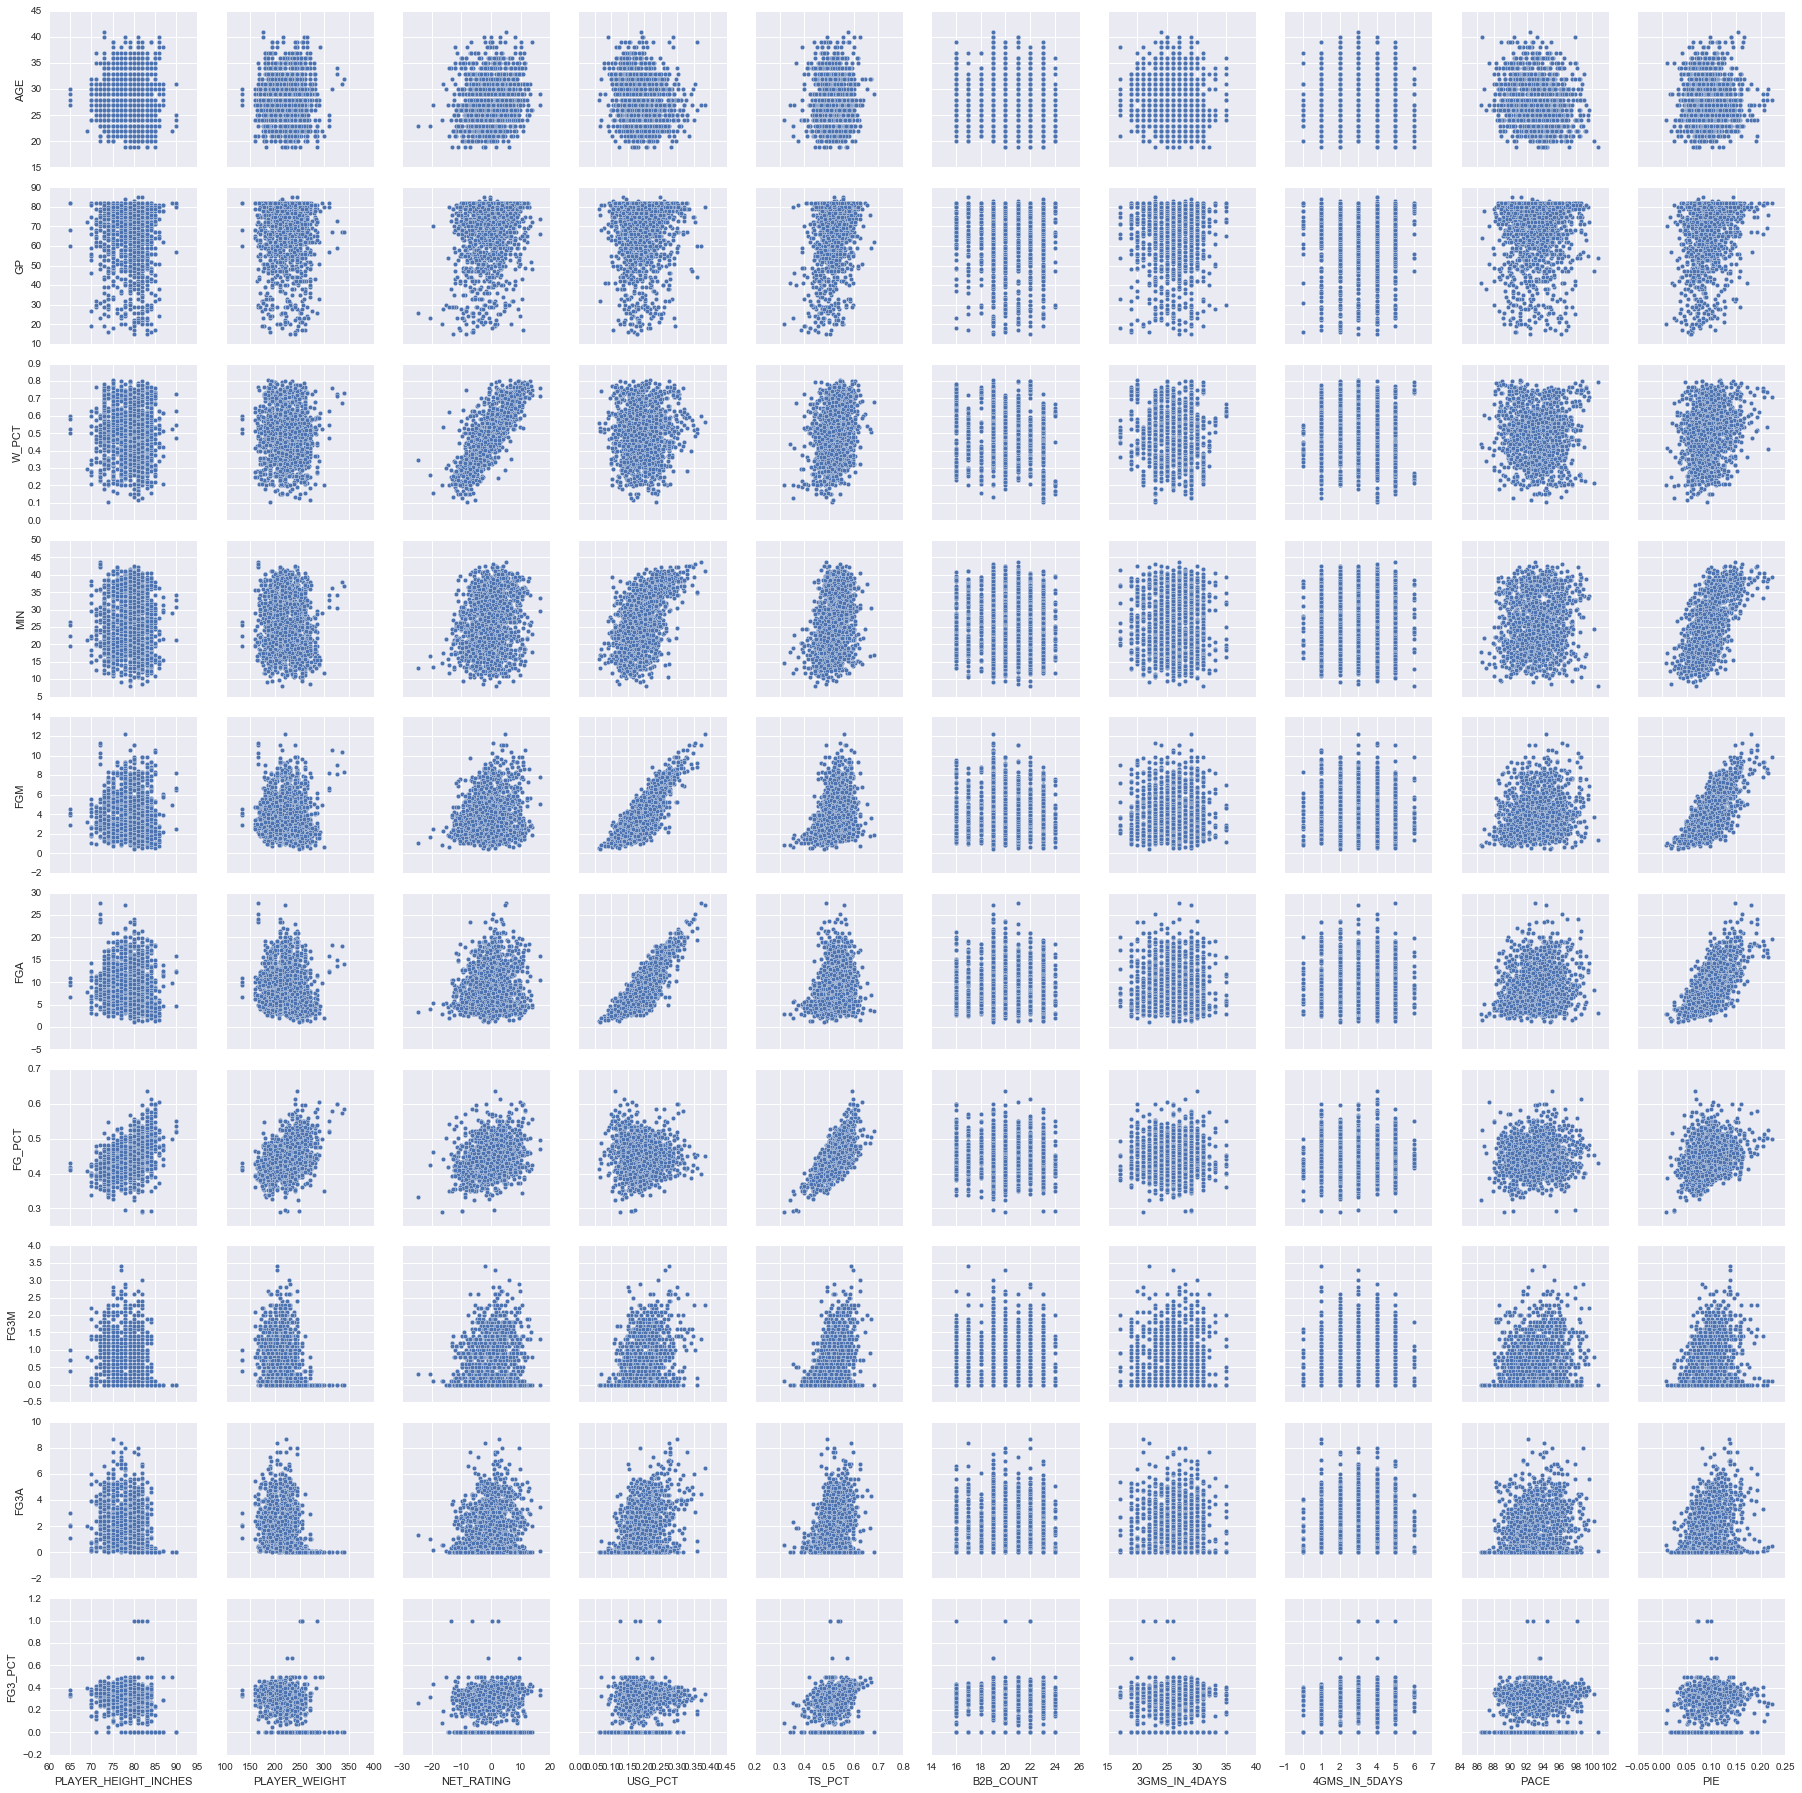

In [546]:
# plotting traditional stats [2:12] with remainning columns [12:70]
sns.pairplot(df_data, x_vars=df_data.columns[60:], y_vars=df_data.columns[2:12])


# Using Pairplot and Heatmap I've chosen to remove redundant variables.

In [602]:
redundant_variables = ['DREB', '15_19ft_FGM', '20_24ft_FGM', '10_14ft_FGM','5_9ft_FGM', 'lessthan5ft_FGM',
                           'opp_lessthan5ft_FGM', 'PCT_UAST_2PM', 'PCT_UAST_FGM','PCT_PTS_3PT']
# drop 'DREB' because directly correlated with 'REB'
# drop 'PCT_PTS_3PT' because directly correlated with 'PCT_FGA_3PT'.
# drop FGM categories because directly correlated with FGA.

df_data.drop(redundant_variables, axis=1, inplace=True)
df_data.columns

Index([u'TEAM_ABBREVIATION', u'level_1', u'AGE', u'GP', u'W_PCT', u'MIN',
       u'FGM', u'FGA', u'FG_PCT', u'FG3M', u'FG3A', u'FG3_PCT', u'FTM', u'FTA',
       u'FT_PCT', u'OREB', u'REB', u'AST', u'TOV', u'STL', u'BLK', u'BLKA',
       u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'PCT_FGA_2PT', u'PCT_FGA_3PT',
       u'PCT_PTS_2PT', u'PCT_PTS_2PT_MR', u'PCT_PTS_FB', u'PCT_PTS_FT',
       u'PCT_PTS_OFF_TOV', u'PCT_PTS_PAINT', u'PCT_AST_2PM', u'PCT_AST_3PM',
       u'PCT_UAST_3PM', u'PCT_AST_FGM', u'lessthan5ft_FGA',
       u'lessthan5ft_FG_PCT', u'5_9ft_FGA', u'5_9ft_FG_PCT', u'10_14ft_FGA',
       u'10_14ft_FG_PCT', u'15_19ft_FGA', u'15_19ft_FG_PCT', u'20_24ft_FGA',
       u'20_24ft_FG_PCT', u'opp_lessthan5ft_FGA', u'opp_lessthan5ft_FG_PCT',
       u'PLAYER_HEIGHT_INCHES', u'PLAYER_WEIGHT', u'NET_RATING', u'USG_PCT',
       u'TS_PCT', u'B2B_COUNT', u'3GMS_IN_4DAYS', u'4GMS_IN_5DAYS', u'PACE',
       u'PIE'],
      dtype='object')

In [603]:
train_columns = [col for col in df_data.columns[2:] if col != 'GP']
trainX, trainy = df_data[train_columns], df_data.GP.values

mask = df_test.MIN > trainX.MIN.min()
testX, testy = df_test[mask][train_columns], df_test[mask].GP.values

print trainX.shape, trainy.shape
print testX.shape, testy.shape


(1470, 57) (1470,)
(395, 57) (395,)


In [554]:
# Initialize the StandardScaler object
ss = StandardScaler()

# use the "fit_transform" function to normalize the X design matrix
trainXn = ss.fit_transform(trainX)
testXn = ss.fit_transform(testX)
# Normalization is necessary for regularized regression because the beta
# values for each predictor variable must be on the same scale. 

# Modeling with Linear Regression, Ridge Regression and Lasso Regression

In [555]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, trainXn, trainy, cv=10)

print linreg_scores
print np.mean(linreg_scores)

[ 0.14159686  0.22891674 -0.0137576   0.18079931  0.25116636  0.1849656
  0.14186312  0.19003046  0.17833381  0.25756745]
0.174148211971


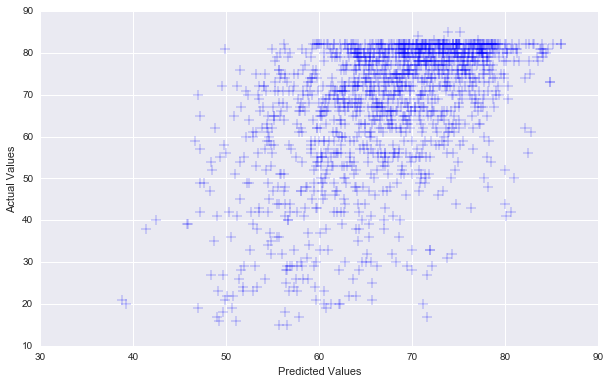

Mean squared error: 178.22


In [563]:
# Perform Linear Regression and create data frame of coefficients 
lr = LinearRegression(fit_intercept='True')
model_lr = lr.fit(trainXn, trainy)
predictions = model_lr.predict(trainXn)

fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, trainy, s=100, c='b', marker='+')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print "Mean squared error: %.2f" % np.mean((predictions - trainy) ** 2)


In [564]:
lr_coefs = pd.DataFrame({'variable': trainX.columns,
                            'lr_coef':model_lr.coef_,
                            'lr_abs_coef':np.abs(model_lr.coef_)})

lr_coefs.sort_values('lr_abs_coef', inplace=True, ascending=False)

lr_coefs.head(25)

,lr_abs_coef,lr_coef,variable
24,438.502868,-438.502868,PCT_FGA_3PT
23,436.819460,-436.819460,PCT_FGA_2PT
30,239.303462,239.303462,PCT_PTS_PAINT
25,209.957223,-209.957223,PCT_PTS_2PT
26,169.271613,169.271613,PCT_PTS_2PT_MR
21,20.151115,20.151115,PTS
3,12.347928,-12.347928,FGM
2,9.477229,9.477229,MIN
6,8.151487,-8.151487,FG3M
10,7.504147,-7.504147,FTA


# Ridge Regression

In [567]:
# range of alphas from 1 to 10^5
ridge_alphas = np.logspace(0, 5, 100)

# find optimal alpha using cross validation
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(trainXn, trainy)

print optimal_ridge.alpha_

236.448941265


In [568]:
# initialize Ridge with optimal alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)


ridge_scores = cross_val_score(ridge, trainXn, trainy, cv=10)
ridge_predict = ridge.fit(trainXn, trainy).predict(trainXn)
rss = [sum((ridge_predict - trainy)**2)]

print ridge_scores
print "Mean of R^2 scores: ", np.mean(ridge_scores)
print "Residual Sum of squares", rss

[ 0.14601827  0.25226294  0.04984332  0.1999884   0.28480565  0.18358404
  0.14128405  0.19509573  0.17386695  0.23928348]
Mean of R^2 scores:  0.186603282856
Residual Sum of squares [269966.12086834805]


In [570]:
# Data Frame of ridge coefficients ordered by absolute value of coefficients
ridge.fit(trainXn, trainy)

ridge_coefs = pd.DataFrame({'variable':trainX.columns,
                            'ridge_coef':ridge.coef_,
                            'ridge_abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('ridge_abs_coef', inplace=True, ascending=False)

ridge_coefs.head(25)

,ridge_abs_coef,ridge_coef,variable
2,2.390376,2.390376,MIN
50,2.231822,-2.231822,USG_PCT
51,1.679138,1.679138,TS_PCT
45,1.615557,1.615557,opp_lessthan5ft_FGA
5,1.191876,1.191876,FG_PCT
0,1.131547,-1.131547,AGE
14,1.057050,1.057050,AST
12,0.974277,0.974277,OREB
49,0.928419,0.928419,NET_RATING
32,0.898121,0.898121,PCT_AST_3PM


# LASSO Regression

In [575]:
# find optimal alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(trainXn, trainy)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.289642459369


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


In [576]:
# Initialize lasso with optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, trainXn, trainy, cv=10)

print lasso_scores
print "Mean R^2 score: ", np.mean(lasso_scores)

[ 0.13679525  0.27667849  0.0697045   0.20621585  0.29305578  0.18541732
  0.14563341  0.17755762  0.19107482  0.2445355 ]
Mean R^2 score:  0.1926668546


In [577]:
lasso.fit(trainXn, trainy)

lasso_coefs = pd.DataFrame({'variable':trainX.columns,
                            'lasso_coef':lasso.coef_,
                            'lasso_abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('lasso_abs_coef', inplace=True, ascending=False)

lasso_coefs.head(25)

,lasso_abs_coef,lasso_coef,variable
2,5.148082,5.148082,MIN
50,2.511494,-2.511494,USG_PCT
51,2.210543,2.210543,TS_PCT
0,1.104703,-1.104703,AGE
32,0.831603,0.831603,PCT_AST_3PM
49,0.738286,0.738286,NET_RATING
5,0.714294,0.714294,FG_PCT
46,0.539880,-0.539880,opp_lessthan5ft_FG_PCT
1,0.527085,0.527085,W_PCT
44,0.312664,0.312664,20_24ft_FG_PCT


In [580]:
ridge_lasso = pd.merge(lasso_coefs, ridge_coefs, on='variable')
ridge_lasso.drop([col for col in ridge_lasso.columns if 'abs' in col], axis=1, inplace=True)
ridge_lasso.head(20)

,lasso_coef,variable,ridge_coef
0,5.148082,MIN,2.390376
1,-2.511494,USG_PCT,-2.231822
2,2.210543,TS_PCT,1.679138
3,-1.104703,AGE,-1.131547
4,0.831603,PCT_AST_3PM,0.898121
5,0.738286,NET_RATING,0.928419
6,0.714294,FG_PCT,1.191876
7,-0.539880,opp_lessthan5ft_FG_PCT,-0.715587
8,0.527085,W_PCT,0.867135
9,0.312664,20_24ft_FG_PCT,0.484287


# ElasticNet

In [581]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(trainXn, trainy)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.300752538621
1.0


In [582]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, trainXn, trainy, cv=10)

print enet_scores
print np.mean(enet_scores)

[ 0.13725301  0.27623787  0.0704349   0.20642539  0.29284927  0.18472312
  0.14620362  0.17708396  0.19106039  0.24430855]
0.192658008315


In [584]:
enet.fit(trainXn, trainy)

enet_coefs = pd.DataFrame({'variable':trainX.columns,
                            'enet_coef':enet.coef_,
                            'enet_abs_coef':np.abs(enet.coef_)})

enet_coefs.sort_values('enet_abs_coef', inplace=True, ascending=False)

enet_coefs.head(25)

,enet_abs_coef,enet_coef,variable
2,5.159615,5.159615,MIN
50,2.484937,-2.484937,USG_PCT
51,2.206052,2.206052,TS_PCT
0,1.090736,-1.090736,AGE
32,0.825103,0.825103,PCT_AST_3PM
49,0.753030,0.753030,NET_RATING
5,0.704853,0.704853,FG_PCT
46,0.525921,-0.525921,opp_lessthan5ft_FG_PCT
1,0.507681,0.507681,W_PCT
44,0.307713,0.307713,20_24ft_FG_PCT


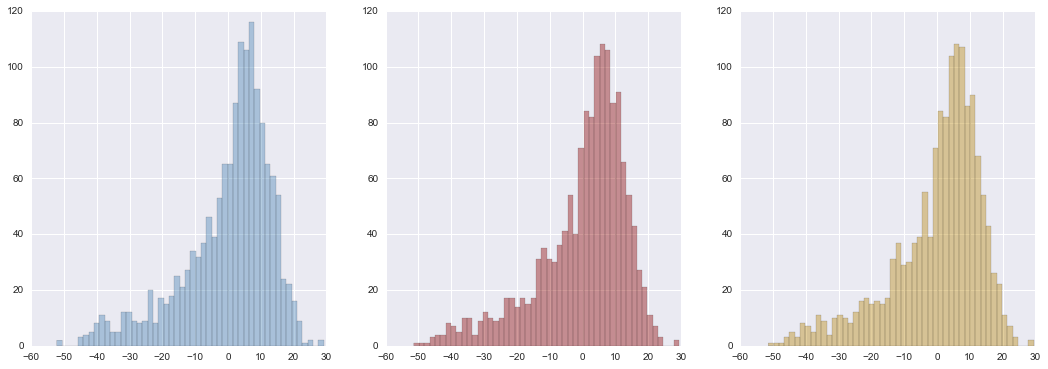

In [585]:
ridge.fit(trainXn, trainy)
enet.fit(trainXn, trainy)
lasso.fit(trainXn, trainy)

# model residuals:

ridge_resid = trainy - ridge.predict(trainXn)
lasso_resid = trainy - lasso.predict(trainXn)
enet_resid = trainy - enet.predict(trainXn)

fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='ElasticNet residuals')

plt.show()

In [586]:
# model_ridge = ridge.fit(trainXn, trainy)
# model_enet = enet.fit(trainXn, trainy)
# model_lasso = lasso.fit(trainXn, trainy)

# yhat_ridge = model_ridge.predict(testXn)
# yhat_enet = model_enet.predict(testXn)
# yhat_lasso = model_lasso.predict(testXn)


# print 'Ridge R^2:', model_ridge.score(testXn, testy)
# print 'Lasso best R^2:', model_lasso.score(testXn, testy)
# print 'ElasticNet best R^2:', model_enet.score(testXn, testy)

Ridge R^2: 0.192870994644
Lasso best R^2: 0.161725286146
ElasticNet best R^2: 0.160550447282
